In [14]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+'');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

# COVID-19 Vaccine Platforms in Development

Got stderr: Mar 27, 2020 2:50:59 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font BCDGEE+Calibri-Light are not implemented in PDFBox and will be ignored
Mar 27, 2020 2:51:00 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font BCDIEE+Calibri are not implemented in PDFBox and will be ignored



<Figure size 2000x800 with 0 Axes>

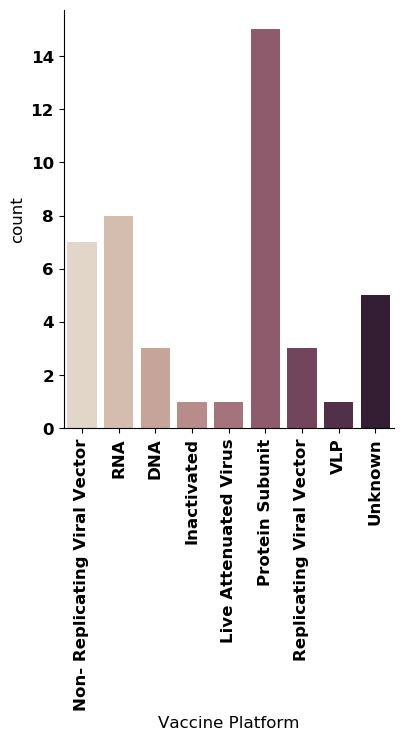

In [7]:


import pandas as pd

import tabula

import requests

from ggplot import *

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

import matplotlib

# Change figure sizes
plt.rcParams['figure.dpi'] = 100

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


#url = 'https://milkeninstitute.org/sites/default/files/2020-03/Covid19-Tracker-3-36-20-FINAL.pdf'

url = 'https://www.who.int/blueprint/priority-diseases/key-action/novel-coronavirus-landscape-ncov.pdf?ua=1'

myfile = requests.get(url)
open('COVID19-data.pdf', 'wb').write(myfile.content)

#declare the path of your file
file_path = "COVID19-data.pdf"
#Convert your file
df = tabula.read_pdf(file_path, pages='all', lattice=True,multiple_tables=False)
#df = df[10]
#df = df.drop(index=0)
df = df[0]
df = df.dropna(axis=0,thresh=5)
#%% Clean the data


df.columns = ['platform', 'type_product', 'developer', 'covid', 'stage',
              'other']

a = df['platform'].values
aa = df['stage'].values
b = []

for i in range(len(a)):
    #aa[i] = aa[i].replace('\r',' ')
    b.append(a[i].replace('\r',' '))
    if b[i] == 'Platform':
        b[i] = np.nan

df['platform'] = b

# Evaluate the different trial types
stages = ['Pre-Clinical', 'Phase 1', 'Phase 2', 'Phase 3']

c = df['stage'].values
stage_list = []

for i in range(len(c)):
    stage = c[i]
    for j in range(len(stages)):
        if stages[j] in stage:
            stage_list.append(stages[j])
    if len(stage_list)<i+1:
            stage_list.append(np.nan)
    

df['stage'] = stage_list


#%% Plot
fig=plt.figure(figsize=(25, 10), dpi= 80, facecolor='w', edgecolor='k')
chart = sns.catplot(x="platform", kind="count", palette="ch:.25", data=df);
t = plt.xlabel('Vaccine Platform')
t = plt.ylabel('Count')
t = chart.set_xticklabels(rotation=90)


#chart2 = sns.catplot(x="stage", kind="count", palette="ch:.25", data=df);
#t = plt.xlabel('FDA Phase')
#t = chart2.set_xticklabels(rotation=75)

#%%
#plt.figure()
#plat_count = df['platform'].value_counts()
#chart3 = sns.barplot(plat_count.index, plat_count.values, alpha=0.8,palette="ch:.25")
#plt.setp(chart3.get_xticklabels(), rotation=90)
#plt.xlabel('Vaccine Platform')
#plt.ylabel('Count')


<pre>






</pre>



# Clincal Trial Phase

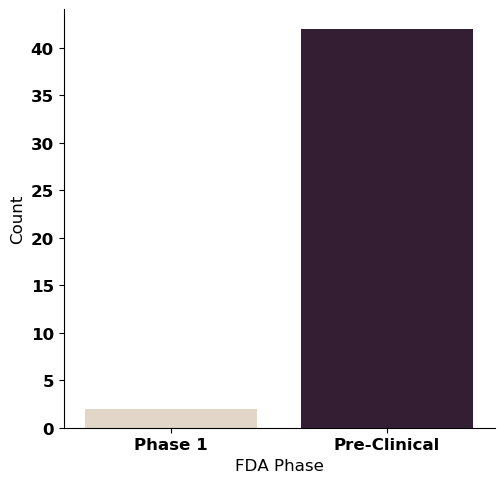

In [9]:
chart2 = sns.catplot(x="stage", kind="count", palette="ch:.25", data=df);
t = plt.xlabel('FDA Phase')
t = plt.ylabel('Count')
t = chart2.set_xticklabels(rotation=0)